<a href="https://colab.research.google.com/github/sandovalan63/Avance/blob/main/Evidencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alan Sandoval Balderas A01284578

In [2]:
p = "https://raw.githubusercontent.com/sandovalan63/Avance/main/Top%2050%20Fastfood.csv"

# Top 50 Fast Food Chains in USA


Esta base de datos contiene los datos de las 50 cadenas de comida rápida más grandes en USA

Las variables que se utilizarán son: 

# Categóricas: 

Nombres: Nombre de la cadena de comida rápida

# Cuantitativas: 

Ventas: Ventas totales en millones de dólares estadounidenses en el año 2021

Promedio Ventas Unidad: Promedio de ventas por unidad en miles de dólares 
estadounidenses

N Franquicias: Número de tiendas franquiciadas

N Tiendas propias: Número de tiendas propias

Tiendas totales: Número total de tiendas

Diferencia del 2020: Cambio total en el número de tiendas desde el año 2020.

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(p)
df.index

RangeIndex(start=0, stop=50, step=1)

In [5]:
df.isnull().any().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Fast-Food Chains                                    False
U.S. Systemwide Sales (Millions - U.S Dollars)      False
Average Sales per Unit (Thousands - U.S Dollars)    False
Franchised Stores                                   False
Company Stores                                      False
2021 Total Units                                    False
Total Change in Units from 2020                     False
dtype: bool>

In [6]:
df.head(5)

,Fast-Food Chains,U.S. Systemwide Sales (Millions - U.S Dollars),Average Sales per Unit (Thousands - U.S Dollars),Franchised Stores,Company Stores,2021 Total Units,Total Change in Units from 2020
0,Arby’s,4462,1309,2293,1116,3409,40
1,Baskin-Robbins,686,296,2317,0,2317,102
2,Bojangles,1485,1924,496,277,773,15
3,Burger King,10033,1470,7054,51,7105,24
4,Carl’s Jr.,1560,1400,1011,47,1058,-21


In [7]:
df = df.rename(columns={'Fast-Food Chains':'Nombres', 'U.S. Systemwide Sales (Millions - U.S Dollars)': 'Ventas', 'Average Sales per Unit (Thousands - U.S Dollars)' : 'Promedio Ventas Unidad', 'Franchised Stores' : 'N Franquicias', 'Company Stores' : 'N Tiendas propias', '2021 Total Units' : 'Tiendas totales', 'Total Change in Units from 2020' : 'Diferencia del 2020'})
df.columns

Index(['Nombres', 'Ventas', 'Promedio Ventas Unidad', 'N Franquicias',
       'N Tiendas propias', 'Tiendas totales', 'Diferencia del 2020'],
      dtype='object')

Cambiamos el nombre de las variables al español 
para que sea más fácil escribir

## P1 Qué tienda tiene el mayor número de franquicias?

In [8]:
tabla = pd.pivot_table(df,
                       index = 'Nombres',
                       values = ['N Franquicias'],               
)
tabla_ordenada = tabla.sort_values('N Franquicias', ascending = False)
tabla_ordenada.head(1)

,N Franquicias
Nombres,
Subway,21147


Aquí podemos ver que Subway tiene el mayor número de franquicias con 21,147 franquicias

## P2 ¿Cuales son las 5 Fast Food Chains con mayor número de ventas?



In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0, 0.5, 'Ventas en millones de dólares')

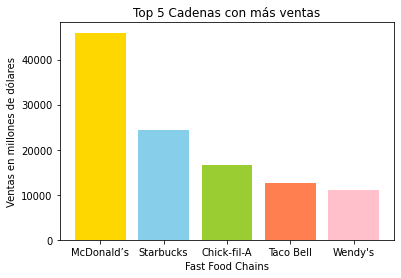

In [10]:
top_cadenas = df.groupby('Nombres')['Ventas'].sum().nlargest(5)

colors = ['gold', 'skyblue', 'yellowgreen', 'coral', 'pink']

plt.bar(top_cadenas.index, top_cadenas.values, color = colors)



plt.title('Top 5 Cadenas con más ventas')
plt.xlabel('Fast Food Chains')
plt.ylabel('Ventas en millones de dólares')



Como resultado, en la gráfica podemos observar que las 5 cadenas con más ventas son: McDonalds, Starbucks, Chick fil-A, Taco Bell y Wendys

# P3 ¿Cuales son las 5 Fast Food Chains con mayor número de franquicias?

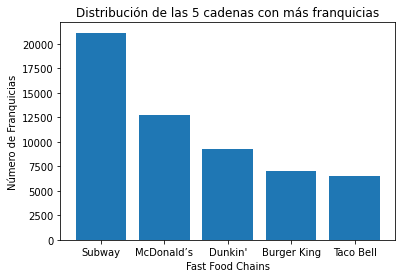

In [11]:
df = df.sort_values('N Franquicias', ascending=False)

df_top5 = df.head(5)

plt.bar(df_top5['Nombres'], df_top5['N Franquicias'])

plt.xlabel('Fast Food Chains')
plt.ylabel('Número de Franquicias')
plt.title('Distribución de las 5 cadenas con más franquicias')

plt.show()

En el histograma, podemos ver que la cadena con más franquicias es Subway, después Mcdonalds, Dunkin, Burger King y Taco Bell

# P4 ¿Existe una relación entre la cantidad de franquicias y las ventas totales de una cadena de comida rápida?

Text(0.5, 1.0, 'Relación entre Franquicias y Ventas Totales')

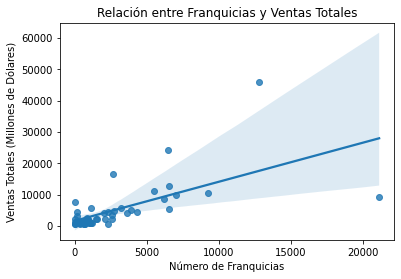

In [12]:
import seaborn as sns

df_relevant = df[['N Franquicias', 'Ventas']]

sns.regplot(x='N Franquicias', y='Ventas', data=df_relevant)

plt.xlabel('Número de Franquicias')
plt.ylabel('Ventas Totales (Millones de Dólares)')
plt.title('Relación entre Franquicias y Ventas Totales')

# P5 ¿Cuál es la distribución porcentual de las ventas totales de las 5 cadenas de comida rápida con mayor cantidad de franquicias en 2021?

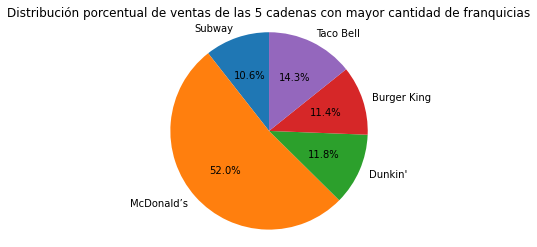

In [13]:
df_top_franchises = df.nlargest(5, 'N Franquicias')
labels = df_top_franchises['Nombres']
sizes = df_top_franchises['Ventas']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Distribución porcentual de ventas de las 5 cadenas con mayor cantidad de franquicias')

plt.show()

Aquí podemos observar que Mcdonalds es la cadena con mayor distribución porcentual con mayor cantidad de franquicias, seguido de subway, taco bell, dunkin y burger king

## P6 ¿Existe una relación entre el número de tiendas propias y el promedio de ventas por unidad en las cadenas de comida rápida en 2021?

In [15]:
x = df['N Tiendas propias']
y = df['Promedio Ventas Unidad']


corr = np.corrcoef(x, y)[0, 1]

print(f'La correlación entre el número de tiendas propias y el promedio de ventas por unidad es: {corr}')

La correlación entre el número de tiendas propias y el promedio de ventas por unidad es: 0.0215433731811128


Como podemos ver, el coeficiente de correlación es de 0.021 lo que se aproxima a 0, por lo que concluimos que si existe una correlación pero no es muy fuerte

P7 ¿Existe una relación lineal entre la diferencia del 2020 y las ventas totales de las cadenas de comida rápida?

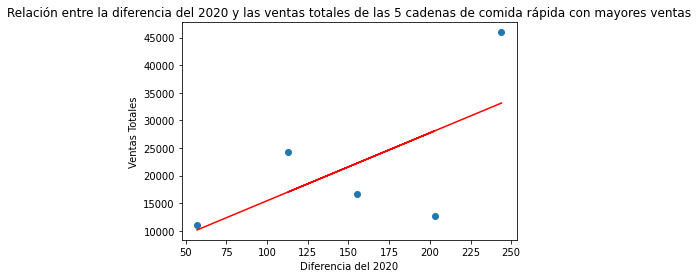

In [23]:
df = df.sort_values('Ventas', ascending=False).head(5)

X = df[['Diferencia del 2020']] 
y = df['Ventas'] 
model = LinearRegression().fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title('Relación entre la diferencia del 2020 y las ventas totales de las 5 cadenas de comida rápida con mayores ventas')
plt.xlabel('Diferencia del 2020')
plt.ylabel('Ventas Totales')
plt.show()

Aquí podemos observar que hay una regresión lineal positiva entre la diferencia de tiendas del 2020 por cadena y las ventas totales. Lo que nos indica que entre más diferencias más ventas